In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt


c:\Users\kalgh\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!python3 -m spacy download en_core_web_sm

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz


python3 -m spacy download en_core_web_sm


pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz


conda install wasabi==0.9.1 -c Conda-forge

python -m spacy download en


In [8]:
# Load spacy English languague model
import en_core_web_sm
NER = spacy.load("en_core_web_sm")
# import en_core_web_sm
# nlp = en_core_web_sm.load()

Load books

In [9]:
import os

# get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]
all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

In [13]:
# Analysis on the first book
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)
book_doc

ï»¿The Limits of the Possible
I
"He's not coming back out, I tell you!" stated a pimply-faced man, shaking his head with
finality. "It's been an hour and a quarter since he went in. He's done for."
The townsfolk, huddled together in the midst of the ruins and rubble, watched the gaping
black hole of the entrance to the tunnel in silence. A fat man dressed in a yellow smock
shifted slightly from one foot to the other, cleared his throat and pulled his wrinkled cap from
his head.
"We have to wait a bit longer," he said as he wiped the sweat from his sparse eyebrows.
"Why wait?" snorted pimply, "There in the caves lurks a basilisk, or have you forgotten,
burgrave? Anyone goes down there, that's the end of them. Have you forgotten how many
have died down there already? What are we waiting for?"
"This was the agreement, wasn't it?" murmured the fat man uncertainly.
"An agreement you made with a living man, burgrave" said the pimply-faced man's
companion, a giant of a man in a leather butche

In [14]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

Load character names


In [15]:
# Read characters
character_df = pd.read_csv("characters.csv")

In [16]:
# Remove brackets and text within brackets
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [17]:
pd.set_option('display.max_rows', None)
character_df.head()

,book,character,character_firstname
0,Category:Baptism of Fire characters,Adalia,Adalia
1,Category:Baptism of Fire characters,Adela,Adela
2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,Category:Baptism of Fire characters,Aglaïs,Aglaïs


Get named entity list per sentence

In [20]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [21]:
sent_entity_df.head()

,sentence,entities
0,"(ï»¿The, Limits, of, the, Possible, \n, I, \n,...",[]
1,"("", It, 's, been, an, hour, and, a, quarter, s...",[an hour and a quarter]
2,"(He, 's, done, for, ., "", \n, The, townsfolk, ...",[]
3,"(A, fat, man, dressed, in, a, yellow, smock, \...",[]
4,"(\n, "", We, have, to, wait, a, bit, longer, ,,...",[]


In [22]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [23]:
filter_entity(["Geralt", "Thu", "2"], character_df)

['Geralt']

In [24]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
89,"(Is, there, anything, keeping, you, in, this, ...","[Geralt of Rivia, Perfect]",[Geralt of Rivia]
95,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
98,"(And, you, said, that, as, if, you, were, sayi...",[Geralt],[Geralt]
102,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
130,"(\n, "", I, forgot, ,, "", Three, Jackdaws, wink...","[Three Jackdaws, Geralt]",[Geralt]
141,"(Geralt, loosened, his, belt, ,, removed, his,...",[Geralt],[Geralt]
146,"(\n, "", Do, the, girls, speak, the, common, la...",[Geralt],[Geralt]
149,"(How, 's, your, soup, ,, Geralt, ?, "", \n, "", ...",[Geralt],[Geralt]
158,"(Yet, there, is, a, certain, principal, underl...",[Geralt],[Geralt]
185,"(Let, 's, say, a, fierce, dragon, destroys, .....",[Geralt],[Geralt]


In [25]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\kalgh\AppData\Local\Temp\ipykernel_23932\364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [26]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
89,"(Is, there, anything, keeping, you, in, this, ...","[Geralt of Rivia, Perfect]",[Geralt]
95,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
98,"(And, you, said, that, as, if, you, were, sayi...",[Geralt],[Geralt]
102,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
130,"(\n, "", I, forgot, ,, "", Three, Jackdaws, wink...","[Three Jackdaws, Geralt]",[Geralt]
...,...,...,...
10819,"(He, only, saw, black, -, gloved, hands, squee...",[Ciri],[Ciri]
10821,"(Oh, ,, Geralt, !)",[Geralt],[Geralt]
10826,"(Say, it, ,, Geralt, !)",[Geralt],[Geralt]
10828,"(Say, it, !, "", \n, "", Forever, ,, Ciri, ., "",...","[Ciri, Geralt]","[Ciri, Geralt]"


Create relationships

In [27]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [28]:
relationship_df = pd.DataFrame(relationships)

In [31]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [32]:
pd.set_option('display.max_rows', None)
relationship_df.head()

,source,target,value
0,Niedamir,Geralt,16
1,Geralt,Niedamir,39
2,Geralt,Eyck,15
3,Eyck,Geralt,15
4,Geralt,Dorregaray,13


Graph analysis and visualization

In [33]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

Graph visualization - Networkx

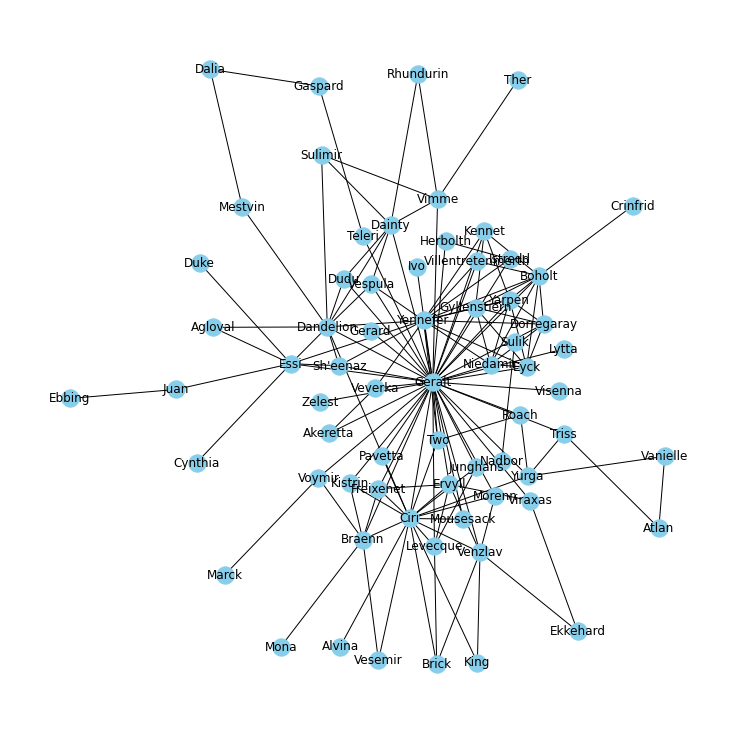

In [34]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Graph visualization - Pyvis


In [36]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

The most important characters in The Witcher


In [37]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Niedamir': 0.10606060606060606,
 'Geralt': 0.6515151515151515,
 'Eyck': 0.10606060606060606,
 'Dorregaray': 0.10606060606060606,
 'Yennefer': 0.24242424242424243,
 'Boholt': 0.15151515151515152,
 'Yarpen': 0.12121212121212122,
 'Gyllenstiern': 0.12121212121212122,
 'Kennet': 0.07575757575757576,
 'Crinfrid': 0.015151515151515152,
 'Villentretenmerth': 0.045454545454545456,
 'Istredd': 0.045454545454545456,
 'Herbolth': 0.030303030303030304,
 'Ivo': 0.015151515151515152,
 'Two': 0.06060606060606061,
 'Dandelion': 0.16666666666666669,
 'Vespula': 0.06060606060606061,
 'Dainty': 0.10606060606060606,
 'Vimme': 0.07575757575757576,
 'Sulimir': 0.045454545454545456,
 'Ther': 0.015151515151515152,
 'Rhundurin': 0.030303030303030304,
 'Dudu': 0.045454545454545456,
 "Sh'eenaz": 0.06060606060606061,
 'Teleri': 0.030303030303030304,
 'Gaspard': 0.030303030303030304,
 'Dalia': 0.030303030303030304,
 'Mestvin': 0.030303030303030304,
 'Essi': 0.12121212121212122,
 'Gerard': 0.015151515151515152,
 

<AxesSubplot:>

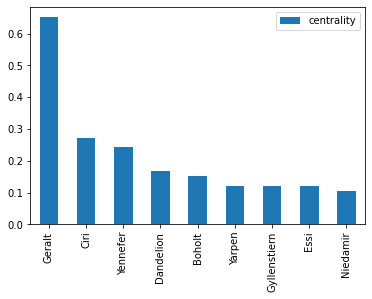

In [38]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

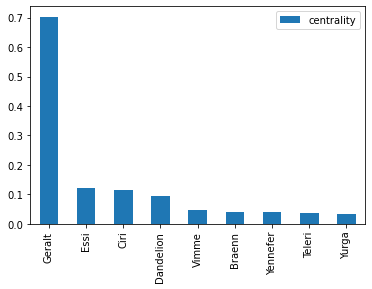

In [39]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

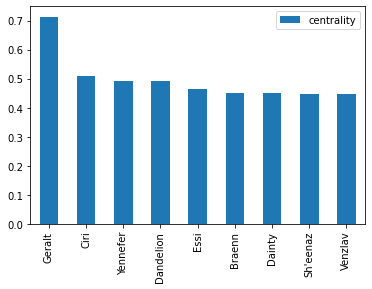

In [40]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [41]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

Community detection

In [43]:
import community as community_louvain

In [44]:
communities = community_louvain.best_partition(G)

In [45]:
communities

{'Niedamir': 0,
 'Geralt': 2,
 'Eyck': 0,
 'Dorregaray': 0,
 'Yennefer': 0,
 'Boholt': 0,
 'Yarpen': 0,
 'Gyllenstiern': 0,
 'Kennet': 0,
 'Crinfrid': 0,
 'Villentretenmerth': 0,
 'Istredd': 2,
 'Herbolth': 2,
 'Ivo': 2,
 'Two': 3,
 'Dandelion': 4,
 'Vespula': 4,
 'Dainty': 4,
 'Vimme': 4,
 'Sulimir': 4,
 'Ther': 4,
 'Rhundurin': 4,
 'Dudu': 4,
 "Sh'eenaz": 4,
 'Teleri': 6,
 'Gaspard': 6,
 'Dalia': 6,
 'Mestvin': 6,
 'Essi': 4,
 'Gerard': 2,
 'Zelest': 2,
 'Duke': 4,
 'Veverka': 2,
 'Akeretta': 2,
 'Agloval': 4,
 'Ebbing': 4,
 'Juan': 4,
 'Cynthia': 4,
 'Ciri': 5,
 'Braenn': 5,
 'Kistrin': 5,
 'Marck': 2,
 'Voymir': 2,
 'Alvina': 5,
 'Vesemir': 5,
 'Ervyll': 5,
 'Freixenet': 5,
 'Venzlav': 5,
 'Ekkehard': 5,
 'Viraxas': 5,
 'Morenn': 5,
 'Mona': 5,
 'Pavetta': 2,
 'Brick': 5,
 'Junghans': 5,
 'Levecque': 5,
 'King': 5,
 'Mousesack': 2,
 'Yurga': 3,
 'Visenna': 2,
 'Triss': 3,
 'Atlan': 3,
 'Vanielle': 3,
 'Lytta': 2,
 'Roach': 3,
 'Nadbor': 1,
 'Sulik': 1}

In [46]:
nx.set_node_attributes(G, communities, 'group')

In [47]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

Evolution of characters' importance


In [52]:
from functions import *

In [53]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('data') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [54]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

C:\Users\kalgh\AppData\Local\Temp\ipykernel_23932\4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\kalgh\AppData\Local\Temp\ipykernel_23932\4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\kalgh\AppData\Local\T

<AxesSubplot:>

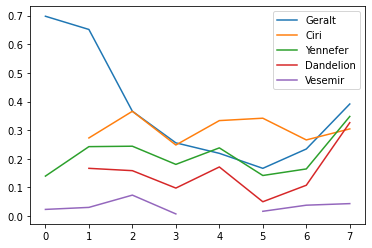

In [55]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()

In [56]:
from IPython.display import IFrame

IFrame(src='witcher.html', width=700, height=600)